# In-class exercises Class 24

---

Today we will continue to learn how to use some Machine Learning tools. 


Last time we used a simple Bayes classifier on blobs and then the Iris dataset.  In class, we discussed how the Bayes classifier uses 'prior' knowledge to try and classify.  The simple example we used assumed, as the prior, that all distributions come from Gaussian distributions.  This certainly isn't always the case, but it isn't a bonkers hypothesis either - remember the Central Limit Theorem?  

Anyway, today we will move on to study a more advanced tool - we will investigate Neural Networks.  We will apply one to the Iris dataset.  You can read about the NN we will use here:

https://scikit-learn.org/stable/modules/neural_networks_supervised.html


Let's start by importing what we need and import the Iris dataset.  


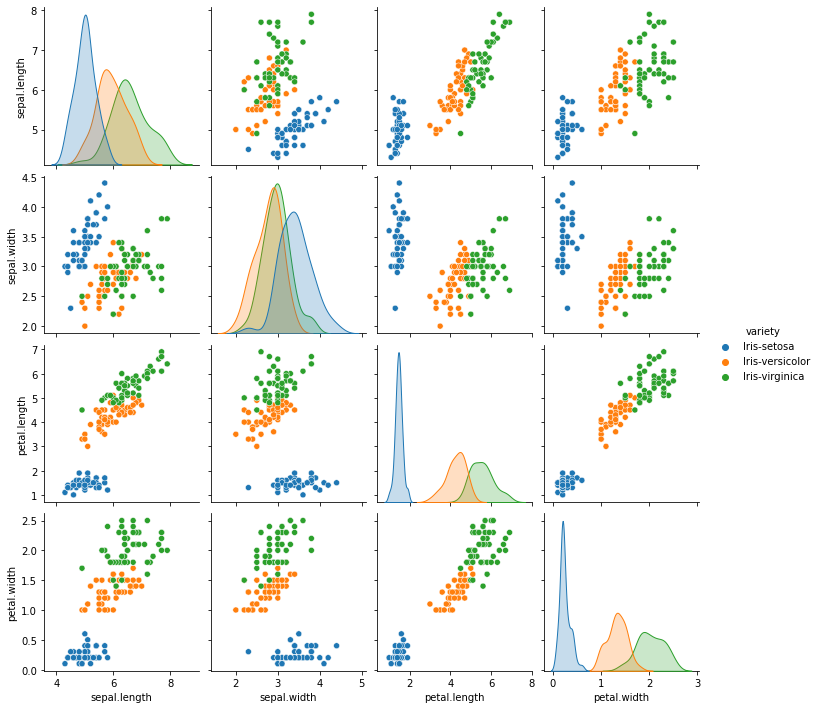

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#We will start using a few sklearn tools
#from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


iris_df = pd.read_csv('data/iris.data')


#Let's print a few rows to make sure it worked.  
iris_df.sample(5)

sns.pairplot(iris_df,hue='variety')

We found that it was pretty easy to separate setosa from the other two, so let's simplify the problem to just versicolor v/s virginica.  

Some fatures of the NN will be easier to understand with this binary classification problem.  

In [10]:

iris_df_drop = iris_df.loc[iris_df["variety"] != 'Iris-setosa']
print('shape:',iris_df_drop.shape,'\n\n')

iris_df_drop.sample(10)

shape: (100, 5) 




,sepal.length,sepal.width,petal.length,petal.width,variety
65,6.7,3.1,4.4,1.4,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
145,6.7,3.0,5.2,2.3,Iris-virginica


That looks good, let's check the pair plot.

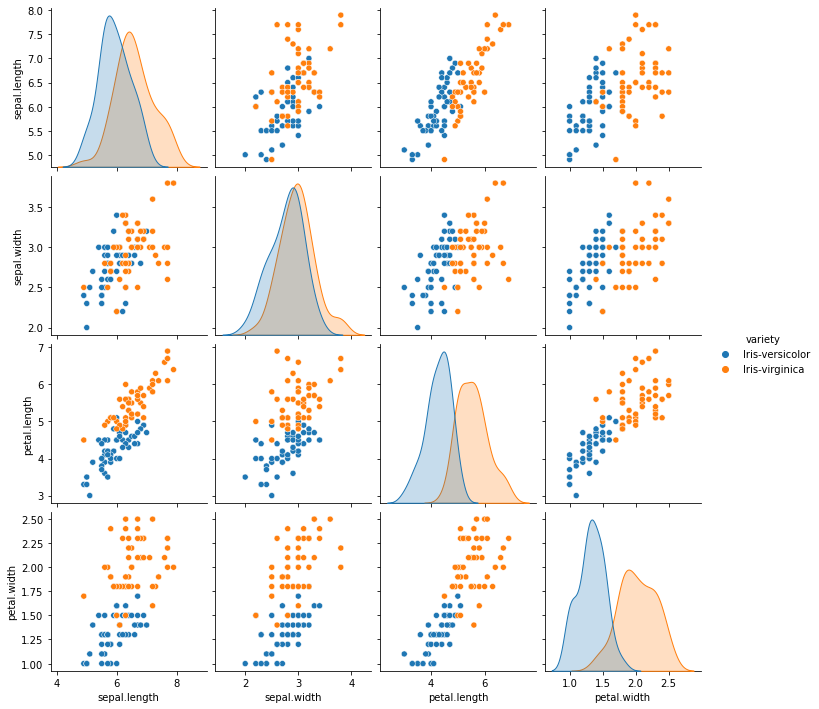

In [11]:
sns.pairplot(iris_df_drop,hue='variety')

OK that worked, only two classes (binary), 100 samples instead of 150, and they are overlapping in all of the variables.  Passed the sanity check!  By now, you should be getting good at coming up with sanity checks when you write code.  Are  you?

Now let's define our feature matrix and target vector for this reduced dataset.

In [12]:
#First we need to define the features matric (X) and the target vector (y)

#Features Matrix
X_iris = iris_df_drop.drop('variety', axis=1)
X_iris.shape

#Target vector
y_iris = iris_df_drop['variety']
y_iris.shape


(100,)

Let's split the data into testing and training datasets to avoid overtraining.  Note that the default split in this function is train 75% and test 25%.

In [13]:
#Split into the test/train samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

## **EXERCISE 1**:  
<span style="color:red">  Explain the potential benefits and risks of using a different train/test percentage when splitting up the dataset.  </red>
   
   

Put your answer here.  

First, let's just use the simple Naive Bayes Algorithm we used last time.

In [14]:
#'fit' the model
model = GaussianNB()
model.fit(Xtrain, ytrain)

#use the model to predict the class of the test sample
y_model = model.predict(Xtest)

#Let's check the accuracy
accuracy_score(ytest, y_model)

0.88

Not bad, 88 percent of the time it can use the trained model to predict the correct class for a sample in the training dataset.  

Maybe we could do better with a different technique, maybe not.  This is a very simple dataset, and it has very limited statistics.  In fact, I think 88 means that 3 events out of 25 were not classified correctly.  Not too much room for improvemennt.  So, it is possible the the Gaussian assumption used by the NB algorithm is pretty good.   Still, as an exercise let's try a Neural Network.  



You can read about the Scikit-learn NN (a Multi-layer Perceptron) here:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html




In [15]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)


#Let's check the accuracy
accuracy_score(ytest, y_model)

0.4

What?  It only gets the right answer 40% of the time?  That is worse than flipping a coin!  WTH?  This neural network sucks!   Forget it.  I hate neural networks.  ;-)

Or, maybe we aren't using this more complicated tool properly.  That seems more likely..  

It turns out that Multi-layer Perceptrons are sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each feature on the input feature X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1.  In other words, our data needs to be scaled before we can use this tool!  

We could easily do it ourselves, but surprise! It turns out there is a nice tool for scaling data:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data!!!
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
# apply same transformation to test data!!!
Xtest = scaler.transform(Xtest)  

Now, we can try again...

In [17]:
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)


#Let's check the accuracy
accuracy_score(ytest, y_model)

0.96

Nice!  Now, only 1 event in the training sample gets misclassified.  That is an improvement!  

Another issue that could be affecting performance is hyperparameters.  The models we used in the past had no tuneable parameters.  The MLP NN does have quite a few!  

Here is a reference:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier

As you can see, there are many different parameters!  We will not investigate those here in any detail.  But, I want you to be aware that when you are doing real work with any of these machine learning algorithms you need to take care and make sure you have reasonable hyperparameters for your model!

## **EXERCISE 2**:  
<span style="color:red">  I just picked some hyperparameters for our model at random.  </red>
    
    model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    
    
 <span style="color:red">   It won't matter much for the simple Iris dataset, but on a more complex data set you definitely want to tune these hyperparameters.  You can play with the hidden_layer_sizes below.   </red>
    

 
    
    
   

In [18]:
#Play with the parameters here and see what happens.  
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)
#Let's check the accuracy
accuracy_score(ytest, y_model)



0.96

## **EXERCISE 3**:  
<span style="color:red">  Explain how you might tune the hyperparameters to improve your model performance.  </red>
    
    
    

 
    
    
   

Put your answer here.

When we do model.predict(), the function is choosing the class with the highest score from the NN output.  But, that NN output is a continuous distribution, and we can get access to the value returned by the NN and do some tests to better understand the performance of the NN.  First, the NN returns the probablity for each class for each of the samples.  Lets look at that for the test sample:

In [19]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)
print(model.predict_proba(Xtest))  #predict_proba returns the probability for the sample being from each class as judged by our NN

[[2.24064016e-007 9.99999776e-001]
 [2.45232355e-007 9.99999755e-001]
 [2.45232355e-007 9.99999755e-001]
 [2.16008607e-007 9.99999784e-001]
 [2.15639094e-007 9.99999784e-001]
 [1.00000000e+000 1.09615513e-092]
 [1.00000000e+000 6.14238864e-074]
 [2.34006104e-007 9.99999766e-001]
 [1.44069672e-006 9.99998559e-001]
 [2.22451175e-007 9.99999778e-001]
 [2.45232355e-007 9.99999755e-001]
 [1.00000000e+000 6.45884900e-057]
 [2.45232355e-007 9.99999755e-001]
 [2.20268530e-007 9.99999780e-001]
 [2.45232355e-007 9.99999755e-001]
 [1.00000000e+000 3.65905524e-102]
 [1.00000000e+000 1.33479661e-102]
 [1.00000000e+000 2.29052489e-050]
 [2.35065745e-007 9.99999765e-001]
 [1.00000000e+000 2.17360895e-073]
 [1.00000000e+000 4.13630459e-065]
 [2.45232355e-007 9.99999755e-001]
 [2.30871396e-007 9.99999769e-001]
 [2.25232747e-007 9.99999775e-001]
 [1.00000000e+000 2.49186395e-086]]


Wow, these probabilities are almost always close to 1 or 0.  Our NN is VERY confident about all of its decisions.  Still it predicted one sample incorrectly.  That could be a problem with the data, or a problem with out NN.  These probabilities must be interpretted with care - they are only as good as our NN and the dataset used to train it.  In this case we only trained with ~100 events!  Let's compare true and predicted values and see if we can understand which one was improperly classified.  

In [20]:
print(ytest)
for i in range(0,len(ytest)):
  
    print(y_model[i])


130     Iris-virginica
134     Iris-virginica
83     Iris-versicolor
131     Iris-virginica
143     Iris-virginica
67     Iris-versicolor
86     Iris-versicolor
132     Iris-virginica
119     Iris-virginica
115     Iris-virginica
142     Iris-virginica
89     Iris-versicolor
106     Iris-virginica
102     Iris-virginica
101     Iris-virginica
82     Iris-versicolor
81     Iris-versicolor
94     Iris-versicolor
128     Iris-virginica
60     Iris-versicolor
52     Iris-versicolor
123     Iris-virginica
147     Iris-virginica
112     Iris-virginica
69     Iris-versicolor
Name: variety, dtype: object
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor


So, it is the 3rd one that differs (I'm sure there is a better way to test, but I ran out of time).  So, if we look at the probabilities from above for the 3rd one we see that the NN was quite confident:  [2.45232355e-007 9.99999755e-001].  Clearly the prababilities from our this NN cannot be taken at face value!  

Some other output that can be useful to look at is what is called the confusion matrix.  

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.  So, diagonal elements were predicted correctly, and non diagonal were predicted incorectly.

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print('\n confusion matrix:\n',confusion_matrix(ytest,y_model),'\n\n')


 confusion matrix:
 [[ 9  1]
 [ 0 15]] 




This is a nice way to summarize the performance of our network.  So, our network misclassified on event from class #0 (versicolor) as class #1 (virginica).

There is a nice tool to visualiize the confusion matrix:


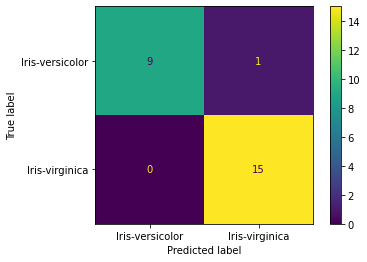

In [22]:
cm=confusion_matrix(ytest,y_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

Note that we can also test the performance of the model on the training dataset.  If it were significantly different, our model might be overtrained!

In [23]:
y_model_train = model.predict(Xtrain)  #Get the model prediction for the training dataset.
print('\n confusion matrix:\n',confusion_matrix(ytrain,y_model_train),'\n\n')


 confusion matrix:
 [[40  0]
 [ 0 35]] 




Our model worked perfect on the training dataset.  

Another useful summary of the performance of the model can be provided by the classification report:
    
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification%20report#sklearn.metrics.classification_report
    
    

In [24]:
print('classification_report\n',classification_report(ytest,y_model),'\n\n')

classification_report
                  precision    recall  f1-score   support

Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.96        25
      macro avg       0.97      0.95      0.96        25
   weighted avg       0.96      0.96      0.96        25
 




Another tool that is valuable to understand performance, and to compare performance between models, is the ROC curve.  It is a little tricky to make the ROC curve with our version of Scikit-learn.  But, let's do it anyway.  First, it is easier if our classifier is binary, and uses 0 vs 1, rather than a string.  So, let's make that.  I'm sure there is an easier way, but I'll make that determination by hand.    

In [25]:
from sklearn.metrics import roc_curve, auc

ytest_bin=[]
for value in ytest:
    print(value)
    variety=-1
    if value=="Iris-versicolor":
        variety=0
    elif value=="Iris-virginica":
        variety=1
    else:
        print("NO MATCH")
    ytest_bin.append(variety)

print(ytest_bin) 





#from sklearn.metrics import RocCurveDisplay
#RocCurveDisplay.from_predictions(ytest, y_model)  -->  This doesn't work with our version?
#RocCurveDisplay.from_estimator(model, Xtest, ytest)


Iris-virginica
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-versicolor
[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]


There is a method in scikit-learn to calculate the values needed for the ROC curve.  See the documentation here:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


In [29]:

fpr2, tpr2, threshold = roc_curve(ytest_bin, model.predict_proba(Xtest)[:,1])

For reference we will also make the curve for a random guess - coin flip!  

In [30]:
# roc curve for tpr = fpr - classifier with 50% prob of the right binary choice.  Flipping a coin.  
random_probs = [0 for i in range(len(ytest_bin))]
p_fpr, p_tpr, _ = roc_curve(ytest_bin, random_probs, pos_label=1)


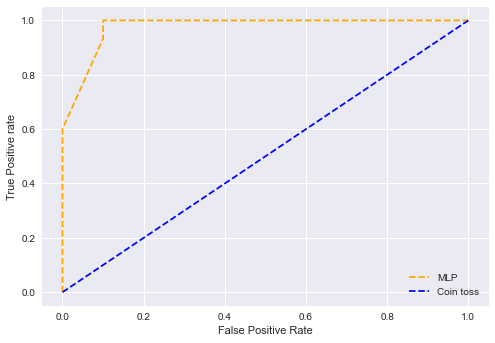

In [31]:


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='MLP')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label="Coin toss")
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

This ROC curve isn't very interesting.  If we had higher statistics, and a datasample that was harder to classify, it would be a nice way to compare performance of classifiers.   

You can learn more about ROC curves here:
    
    https://en.wikipedia.org/wiki/Receiver_operating_characteristic
        
        

Let's do it also for the full Iris dataset!  Let's make sure our data frame looks ok.


In [32]:

iris_df.sample(10)



,sepal.length,sepal.width,petal.length,petal.width,variety
63,6.1,2.9,4.7,1.4,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
76,6.8,2.8,4.8,1.4,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa


In [33]:
iris_df.shape

(150, 5)

OK.  Looks like the full sample.  

In [34]:
#Features Matrix
X_iris = iris_df.drop('variety', axis=1)
X_iris.shape

#Target vector
y_iris = iris_df['variety']
y_iris.shape




#Split into the test/train samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)




 
# Don't cheat - fit only on training data!!!
scaler.fit(Xtrain)  
Xtrain = scaler.transform(Xtrain)  
# apply same transformation to test data!!!
Xtest = scaler.transform(Xtest)  


model = MLPClassifier(solver='lbfgs', alpha=10, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(Xtrain, ytrain)

MLPClassifier(alpha=10, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

OK, let's see how it performed:

In [35]:
y_model = model.predict(Xtest)
#Let's check the accuracy
accuracy_score(ytest, y_model)

0.9736842105263158

Nice.  It worked pretty well.  Let's look at the confusion matrix...

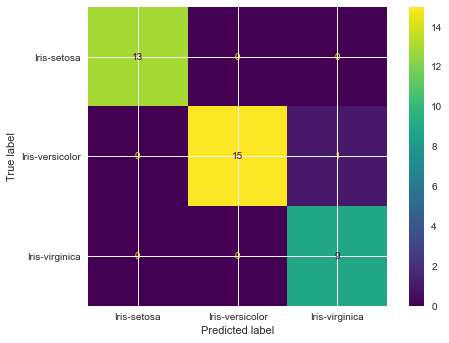

In [36]:
cm=confusion_matrix(ytest,y_model)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

As expected, Iris-setosa was easy.   Probably it is the same event that was misclassified.

One way to validate the network and to test for overtraining is to run the process again with a different test/train split and see if the results are robust, or average over many result.  The variation in the results in some measure of how uncertain the result it...    

## **EXERCISE 4**:  
<span style="color:red">  Run the example again with all 3 classes, but change the random_state when you splitting into the test and train sample.  Does the result change?  Try it with a few different values.  Explain what changes...   </red>
    
    
    

 
    
    
   

Put your answer here.